<a href="https://colab.research.google.com/github/KelvinLam05/Sentiment-analysis-From-binary-to-multi-class-classification/blob/main/Sentiment_analysis_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

For each textual review, we want to predict if it corresponds to a good review (the customer is happy) or to a bad one (the customer is not satisfied). The reviews overall ratings can range from 1/5 to 5/5. In order to simplify the problem we will split those into two categories:

* bad reviews have overall ratings <= 2

* good reviews have overall ratings >= 3

The challenge here is to be able to predict this information using only the raw textual data from the review.

**Data set information**

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import ktrain
import tensorflow as tf
from ktrain import text
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv('/content/amazon_alexa.tsv', sep = '\t')

In [ ]:
# Examine the data
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


**Preprocessing**

In [ ]:
# Checking for missing values
df.isnull().sum().sort_values(ascending = False)

feedback            0
verified_reviews    0
variation           0
date                0
rating              0
dtype: int64

In [ ]:
# Drop columns that are not needed
df = df[['verified_reviews', 'feedback']]

In [ ]:
# Checking the distribution of classes
df['feedback'].value_counts() 

1    2893
0     257
Name: feedback, dtype: int64

It is evident, that the dataset is imbalanced.

In [ ]:
# Find all unique characters and symbols 
all_text = str()

for sentence in df['verified_reviews'].values:
    all_text += sentence
    
''.join(set(all_text))

'😂💋😬$N=_😊FóG-#xAjqI🤓1e😔c&😄Y⭐D2lúHp]Pd*.😥iL7TR😑b“\'U9Vé😁0😳a”+"vñX:‼rá6🎶O;fM‘⏰Euw,❤😍WC—so ![👍’🏻Jtk%5/z️8m4😏B😉ySn3KZ()í?g🏾h\u200bQ😎'

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [ ]:
def clean_review(review_text):
  
  review_text = re.sub('[^a-zA-Z]', ' ', review_text)                        # Removing all irrelevant characters (numbers and punctuation)
  review_text = str(review_text).lower()                                     # Convert all characters into lowercase
  review_text = word_tokenize(review_text)                                   # Tokenization
  review_text = [item for item in review_text if item not in stop_words]     # Removing Stopwords
  review_text = [lemma.lemmatize(word = w, pos = 'v') for w in review_text]  # Lemmatization
  review_text = [i for i in review_text if len(i) > 2]                       # Remove the words having length <= 2
  review_text = ' '.join (review_text)                                       # Convert the list of tokens into back to the string
  
  return review_text 

In [ ]:
df['clean_review'] = df['verified_reviews'].apply(clean_review)

In [ ]:
all_text = str()

for sentence in df['clean_review'].values:
    all_text += sentence
    
''.join(set(all_text))

'so lvtkpzdmrxijqybnefghcuwa'

In [ ]:
df['clean_review'].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing old learn dinosaurs control ligh...
4                                                music
Name: clean_review, dtype: object

In [ ]:
df['clean_review'].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing old learn dinosaurs control ligh...
4                                                music
Name: clean_review, dtype: object

In [ ]:
df = df[['clean_review', 'feedback']]

**Split the train and test data**

In [ ]:
# Define features and target
X = df['clean_review']

In [ ]:
y = df['feedback']

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

**Preprocess data and build a transformer model**

In [ ]:
# Transformer model
MODEL_NAME = 'bhadresh-savani/distilbert-base-uncased-sentiment-sst2' 

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen = 500, class_names =  ['negative', 'positive'])

In [ ]:
# Convert training set into a list
X_tr = pd.DataFrame(data = X_train, columns = ['clean_review'])
X_tr = X_tr['clean_review'].tolist()

In [ ]:
y_tr = pd.DataFrame(data = y_train, columns = ['feedback'])
y_tr = y_tr['feedback'].tolist()

In [ ]:
# Convert testing set into a list
X_te = pd.DataFrame(data = X_test, columns = ['clean_review'])
X_te = X_te['clean_review'].tolist()

In [ ]:
y_te = pd.DataFrame(data = y_test, columns = ['feedback'])
y_te = y_te['feedback'].tolist()

In [ ]:
# Preprocessing training and testing set 
trn = t.preprocess_train(X_tr, y_tr)
val = t.preprocess_test(X_te, y_te)

preprocessing train...
language: en
train sequence lengths:
	mean : 12
	95percentile : 41
	99percentile : 73


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 36
	99percentile : 67


In [ ]:
# Model classifier
model = t.get_classifier()

In [ ]:
# Wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, train_data = trn, val_data = val, batch_size = 6)

**Re-Weighting**

Here our loss function is influenced by assigning relatively higher costs to examples from minority classes. We can use the re-weighting method from scikit-learn library to estimate class weights for unbalanced dataset with ‘balanced’ as a parameter which the class weights will be given by n_samples / (n_classes * np.bincount(y)).

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced', np.unique(y_train), y_train))) 

In [ ]:
class_weights

{0: 6.116504854368932, 1: 0.5445116681071738}

As you can see the lower data in the certain classes then the higher weight it gets, vice versa.

In [ ]:
# Briefly simulate training to find good learning rate
learner.lr_find(max_epochs = 1, class_weight = class_weights) 

simulating training for different learning rates... this may take a few moments...
420/420 [==============================] - 225s 509ms/step - loss: 7.3585 - accuracy: 0.7306


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


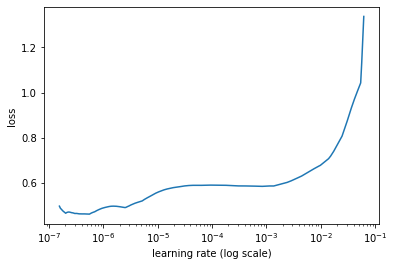

In [ ]:
# Visually identify best learning rate
learner.lr_plot()

**Train model**

In [ ]:
# Training using the 1cycle policy
learner.fit_onecycle(1.3e-7, 1, class_weight = class_weights)



begin training using onecycle policy with max lr of 1.3e-07...
420/420 [==============================] - 312s 718ms/step - loss: 0.7682 - accuracy: 0.7393 - val_loss: 0.6987 - val_accuracy: 0.7746


**Evaluate/Inspect model**

In [ ]:
# Evaluate model
learner.validate(class_names = t.get_classes())

              precision    recall  f1-score   support

    negative       0.24      0.80      0.37        51
    positive       0.98      0.77      0.86       579

    accuracy                           0.77       630
   macro avg       0.61      0.79      0.61       630
weighted avg       0.92      0.77      0.82       630



array([[ 41,  10],
       [132, 447]])

The macro-averaged F1 score we get is ~61%.

**Split the train and test data**

In [ ]:
df['feedback'].value_counts() 

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
# Define features and target
X = df['clean_review']

In [ ]:
y = df['feedback']

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

**Oversampling**

Oversampling is the process that reproduce data for the minority class to match the number of observations in the majority class. 

In [ ]:
from sklearn.utils import resample

In [ ]:
# Concatenate training data
X = pd.concat([X_train, y_train], axis = 1)

In [ ]:
# Define minority and majority classes
bad_review = X[X.feedback == 0]
good_review = X[X.feedback == 1]

In [ ]:
# Upsample minority class
bad_review_upsampled = resample(bad_review,
                          replace = True, # Sample with replacement
                          n_samples = len(good_review), # Match number in majority class
                          random_state = 42) # Reproducible results

In [ ]:
# Combine majority and upsampled minority
df_train_up = pd.concat([good_review, bad_review_upsampled])

In [ ]:
# Check new class counts
df_train_up.feedback.value_counts()

1    2314
0    2314
Name: feedback, dtype: int64

In [ ]:
# Reassign training data
X_train = df_train_up['clean_review']

In [ ]:
y_train = df_train_up['feedback']

**Preprocess data and build a transformer model**

In [ ]:
# Transformer model
MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english' 

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen = 500, class_names =  ['negative', 'positive'])

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

In [ ]:
# Convert training set into a list
X_tr = pd.DataFrame(data = X_train, columns = ['clean_review'])
X_tr = X_tr['clean_review'].tolist()

In [ ]:
y_tr = pd.DataFrame(data = y_train, columns = ['feedback'])
y_tr = y_tr['feedback'].tolist()

In [ ]:
# Convert testing set into a list
X_te = pd.DataFrame(data = X_test, columns = ['clean_review'])
X_te = X_te['clean_review'].tolist()

In [ ]:
y_te = pd.DataFrame(data = y_test, columns = ['feedback'])
y_te = y_te['feedback'].tolist()

In [ ]:
# Preprocessing training and testing set 
trn = t.preprocess_train(X_tr, y_tr)
val = t.preprocess_test(X_te, y_te)

preprocessing train...
language: en
train sequence lengths:
	mean : 16
	95percentile : 56
	99percentile : 84


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 36
	99percentile : 67


In [ ]:
# Model classifier
model = t.get_classifier()

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, train_data = trn, val_data = val, batch_size = 6)

**Estimate a good learning rate**

In [ ]:
# Briefly simulate training to find good learning rate
learner.lr_find(max_epochs = 1) 

simulating training for different learning rates... this may take a few moments...
771/771 [==============================] - 481s 606ms/step - loss: 266.4531 - accuracy: 0.6655


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


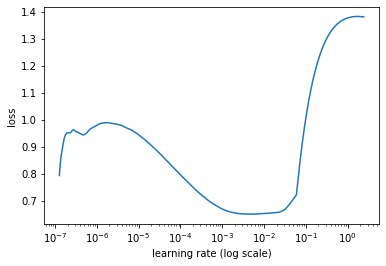

In [ ]:
# Visually identify best learning rate
learner.lr_plot()

**Train model**

In [ ]:
# Training using the 1cycle policy
learner.fit_onecycle(5.5e-3, 1)



begin training using onecycle policy with max lr of 0.0055...
772/772 [==============================] - 525s 666ms/step - loss: 0.7110 - accuracy: 0.4981 - val_loss: 0.6870 - val_accuracy: 0.9190


**Evaluate/Inspect model**

In [ ]:
# Evaluate model
learner.validate(class_names = t.get_classes())

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        51
    positive       0.92      1.00      0.96       579

    accuracy                           0.92       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.84      0.92      0.88       630



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,  51],
       [  0, 579]])

The macro-averaged F1 score we get is ~48%.

**Split the train and test data**

In [ ]:
df['feedback'].value_counts() 

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
X = df['clean_review']

In [ ]:
y = df['feedback']

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

**Undersampling**

Undersampling is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

In [ ]:
from sklearn.utils import resample

In [ ]:
# Concatenate training data
X = pd.concat([X_train, y_train], axis = 1)

In [ ]:
# Define minority and majority classes
bad_review = X[X.feedback == 0]
good_review = X[X.feedback == 1]

In [ ]:
# Downsample majority class
good_review_downsampled = resample(good_review,
                          replace = False, # Sample with replacement
                          n_samples = len(bad_review), # Match number in minority class
                          random_state = 42) # Reproducible results

In [ ]:
# Combine minority and downsampled majority
df_train_down = pd.concat([bad_review, good_review_downsampled])

In [ ]:
# Check new class counts
df_train_down.feedback.value_counts()

1    206
0    206
Name: feedback, dtype: int64

In [ ]:
# Reassign training data
X_train = df_train_down['clean_review']

In [ ]:
y_train = df_train_down['feedback']

**Preprocess data and build a transformer model**

In [ ]:
# Transformer model
MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english' 

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen = 500, class_names =  ['negative', 'positive'])

In [ ]:
# Convert training set into a list
X_tr = pd.DataFrame(data = X_train, columns = ['clean_review'])
X_tr = X_tr['clean_review'].tolist()

In [ ]:
y_tr = pd.DataFrame(data = y_train, columns = ['feedback'])
y_tr = y_tr['feedback'].tolist()

In [ ]:
# Convert testing set into a list
X_te = pd.DataFrame(data = X_test, columns = ['clean_review'])
X_te = X_te['clean_review'].tolist()

In [ ]:
y_te = pd.DataFrame(data = y_test, columns = ['feedback'])
y_te = y_te['feedback'].tolist()

In [ ]:
# Preprocessing training and testing set 
trn = t.preprocess_train(X_tr, y_tr)
val = t.preprocess_test(X_te, y_te)

preprocessing train...
language: en
train sequence lengths:
	mean : 16
	95percentile : 60
	99percentile : 88


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 36
	99percentile : 67


In [ ]:
# Model classifier
model = t.get_classifier()

In [ ]:
# Wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, train_data = trn, val_data = val, batch_size = 6)

**Estimate a good learning rate**

In [ ]:
# Briefly simulate training to find good learning rate
learner.lr_find(max_epochs = 1) 

simulating training for different learning rates... this may take a few moments...
68/68 [==============================] - 48s 544ms/step - loss: 8.8480 - accuracy: 0.6930


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


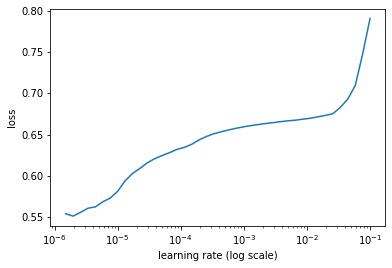

In [ ]:
# Visually identify best learning rate
learner.lr_plot()

**Train model**

In [ ]:
# Training using the 1cycle policy
learner.fit_onecycle(1.3e-6, 1)



begin training using onecycle policy with max lr of 1.3e-06...
69/69 [==============================] - 66s 809ms/step - loss: 0.9046 - accuracy: 0.7549 - val_loss: 0.8382 - val_accuracy: 0.7667


**Evaluate/Inspect model**

In [ ]:
# Evaluate model
learner.validate(class_names = t.get_classes())

              precision    recall  f1-score   support

    negative       0.23      0.78      0.35        51
    positive       0.98      0.77      0.86       579

    accuracy                           0.77       630
   macro avg       0.60      0.77      0.61       630
weighted avg       0.92      0.77      0.82       630



array([[ 40,  11],
       [136, 443]])

The macro-averaged F1 score we get is ~61%.

**Running ML algorithms**

The Naive Bayes classifier is a simple classifier that classifies based on probabilities of events. It is the applied commonly to text classification. Though it is a simple algorithm, it performs well in many text classification problems.

**Split the train and test data**

In [ ]:
df['feedback'].value_counts() 

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
X = df['clean_review']

In [ ]:
y = df['feedback']

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
import optuna

**Extracting features from text files**

Text files are actually series of words (ordered). In order to run machine learning algorithms we need to convert the text files into numerical feature vectors. We will be using bag of words model for our example. Briefly, we segment each text file into words (for English splitting by space), and count # of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).

**TF:** Just counting the number of words in each document has 1 issue: it will give more weightage to longer documents than shorter documents. To avoid this, we can use frequency (TF - Term Frequencies) i.e. #count(word) / #Total words, in each document.

**TF-IDF:** Finally, we can even reduce the weightage of more common words like (the, is, an etc.) which occurs in all document. This is called as TF-IDF i.e Term Frequency times inverse document frequency.

**Baseline**

**Building a pipeline:** We can write less code and do all of the above, by building a pipeline as follows:

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BernoulliNB(binarize = None))])

**Optuna**

Almost all the classifiers will have various parameters which can be tuned to obtain optimal performance. Optuna gives an extremely useful tool 'Optuna'.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):

  params = {
    'vect__max_df': trial.suggest_uniform('vect__max_df', 0.0, 1.0),
    'vect__max_features' : trial.suggest_int('vect__max_features', 0, 50000),
    'tfidf__use_idf': trial.suggest_categorical('tfidf__use_idf', [True, False]),  
    'clf__fit_prior': trial.suggest_categorical('clf__fit_prior', [True, False]),
    'clf__alpha': trial.suggest_uniform('clf__alpha', 1e-25, 1)
  }

  text_clf.set_params(**params)

  scores = (cross_val_score(text_clf, X, y, cv = 10, scoring = 'f1_macro'))
  
  return scores.mean()  

In [ ]:
# Create Study object
study = optuna.create_study(direction = 'maximize')

# Optimize the study, use more trials to obtain better result, use less trials to be more cost-efficient
study.optimize(objective, n_trials = 200)

[I 2021-10-18 15:13:36,901] A new study created in memory with name: no-name-ad9acfea-2698-4111-8461-9b49d80a7439
[I 2021-10-18 15:13:38,363] Trial 0 finished with value: 0.8089464737021812 and parameters: {'vect__max_df': 0.15703017107424988, 'vect__max_features': 19837, 'tfidf__use_idf': True, 'clf__fit_prior': True, 'clf__alpha': 0.8628089639101039}. Best is trial 0 with value: 0.8089464737021812.
[I 2021-10-18 15:13:39,790] Trial 1 finished with value: 0.7829285683613845 and parameters: {'vect__max_df': 0.8600931248875916, 'vect__max_features': 35445, 'tfidf__use_idf': False, 'clf__fit_prior': False, 'clf__alpha': 0.04756958044023163}. Best is trial 0 with value: 0.8089464737021812.
[I 2021-10-18 15:13:41,241] Trial 2 finished with value: 0.7859229213308487 and parameters: {'vect__max_df': 0.1507330419737043, 'vect__max_features': 18704, 'tfidf__use_idf': False, 'clf__fit_prior': True, 'clf__alpha': 0.10486656380439485}. Best is trial 0 with value: 0.8089464737021812.
[I 2021-10-18

In [ ]:
# Print the result
best_params = study.best_params
best_score = study.best_value

print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

Best score: 0.8132600999415617

Optimized parameters: {'vect__max_df': 0.31988214562714157, 'vect__max_features': 44763, 'tfidf__use_idf': False, 'clf__fit_prior': True, 'clf__alpha': 0.843704168364195}



In [ ]:
# Set the best parameters to the model 
text_clf.set_params(**study.best_params)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.31988214562714157, max_features=44763,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('ove',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('clf', BernoulliNB(alpha=0.843704168364195, binarize=None))])

In [ ]:
# Fit on train data
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.31988214562714157, max_features=44763,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('ove',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('clf', BernoulliNB(alpha=0.843704168364195, binarize=None))])

In [ ]:
# Predict on test data
y_pred_test = text_clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
# Print F1 score
print('F1 score(test set):', f1_score(y_test, y_pred_test, average = 'macro'))

F1 score(test set): 0.773613069077038


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        51
           1       0.96      0.97      0.97       579

    accuracy                           0.94       630
   macro avg       0.80      0.75      0.77       630
weighted avg       0.93      0.94      0.94       630



The macro-averaged F1 score we get is ~77%.

**Random Oversampling**

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

Random oversampling can be implemented using the RandomOverSampler class.

The class can be defined and takes a sampling_strategy argument that can be set to 'minority' to automatically balance the minority class with majority class or classes.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('ove', RandomOverSampler(sampling_strategy = 'minority', random_state = 42)),
                     ('clf', BernoulliNB(binarize = None))])

This means that if the majority class had 1,000 examples and the minority class had 100, this strategy would oversampling the minority class so that it has 1,000 examples.

In [ ]:
def objective(trial):

  params = {
    'vect__max_df': trial.suggest_uniform('vect__max_df', 0.0, 1.0),
    'vect__max_features' : trial.suggest_int('vect__max_features', 0, 50000),
    'tfidf__use_idf': trial.suggest_categorical('tfidf__use_idf', [True, False]),
    'clf__fit_prior': trial.suggest_categorical('clf__fit_prior', [True, False]),
    'clf__alpha': trial.suggest_uniform('clf__alpha', 1e-25, 1.0)
  }

  text_clf.set_params(**params)

  scores = (cross_val_score(text_clf, X, y, cv = 10, scoring = 'f1_macro'))
  
  return scores.mean()  

In [ ]:
# Create Study object
study = optuna.create_study(direction = 'maximize')

# Optimize the study, use more trials to obtain better result, use less trials to be more cost-efficient
study.optimize(objective, n_trials = 200)

[I 2021-10-18 15:18:24,896] A new study created in memory with name: no-name-686e11e9-baa3-414a-ac47-ae2af57aa1ca
[I 2021-10-18 15:18:26,441] Trial 0 finished with value: 0.8060789408802655 and parameters: {'vect__max_df': 0.36831269117668963, 'vect__max_features': 39557, 'tfidf__use_idf': True, 'clf__fit_prior': True, 'clf__alpha': 0.7165001710866636}. Best is trial 0 with value: 0.8060789408802655.
[I 2021-10-18 15:18:27,988] Trial 1 finished with value: 0.8003725890093669 and parameters: {'vect__max_df': 0.456946876670111, 'vect__max_features': 43509, 'tfidf__use_idf': True, 'clf__fit_prior': False, 'clf__alpha': 0.27854927090828696}. Best is trial 0 with value: 0.8060789408802655.
[I 2021-10-18 15:18:29,468] Trial 2 finished with value: 0.8133317103574302 and parameters: {'vect__max_df': 0.12496415574168596, 'vect__max_features': 25605, 'tfidf__use_idf': False, 'clf__fit_prior': False, 'clf__alpha': 0.6263689041462646}. Best is trial 2 with value: 0.8133317103574302.
[I 2021-10-18 

In [ ]:
# Print the result
best_params = study.best_params
best_score = study.best_value

print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

Best score: 0.8133317103574302

Optimized parameters: {'vect__max_df': 0.12496415574168596, 'vect__max_features': 25605, 'tfidf__use_idf': False, 'clf__fit_prior': False, 'clf__alpha': 0.6263689041462646}



In [ ]:
# Set the best parameters to the model 
text_clf.set_params(**study.best_params)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.12496415574168596, max_features=25605,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('ove',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('clf',
                 BernoulliNB(alpha=0.6263689041462646, binarize=None,
                             fit_prior=False))])

In [ ]:
# Fit on train data
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.12496415574168596, max_features=25605,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('ove',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('clf',
                 BernoulliNB(alpha=0.6263689041462646, binarize=None,
                             fit_prior=False))])

In [ ]:
# Predict on test data
y_pred_test = text_clf.predict(X_test)

In [ ]:
# Print F1 score
print('F1 score(test set):', f1_score(y_test, y_pred_test, average = 'macro'))

F1 score(test set): 0.7503938966746828


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54        51
           1       0.96      0.97      0.96       579

    accuracy                           0.93       630
   macro avg       0.78      0.73      0.75       630
weighted avg       0.93      0.93      0.93       630



The macro-averaged F1 score we get is ~75%.

**Random Undersampling**

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('und', RandomUnderSampler(sampling_strategy = 'majority', random_state = 42)),
                     ('clf', BernoulliNB(binarize = None))])

In [ ]:
def objective(trial):

  params = {
    'vect__max_df': trial.suggest_uniform('vect__max_df', 0.0, 1.0),
    'vect__max_features' : trial.suggest_int('vect__max_features', 0, 50000),
    'tfidf__use_idf': trial.suggest_categorical('tfidf__use_idf', [True, False]),
    'und__replacement': trial.suggest_categorical('und__replacement', [True, False]),
    'clf__fit_prior': trial.suggest_categorical('clf__fit_prior', [True, False]),
    'clf__alpha': trial.suggest_uniform('clf__alpha', 1e-25, 1)
  }

  text_clf.set_params(**params)

  scores = (cross_val_score(text_clf, X, y, cv = 10, scoring = 'f1_macro'))
  
  return scores.mean()  

In [ ]:
# Create Study object
study = optuna.create_study(direction = 'maximize')

# Optimize the study, use more trials to obtain better result, use less trials to be more cost-efficient
study.optimize(objective, n_trials = 200)

[I 2021-10-18 15:23:18,826] A new study created in memory with name: no-name-d58524cd-a755-4b28-b882-2758a196bb2b
[I 2021-10-18 15:23:20,257] Trial 0 finished with value: 0.7329403293169452 and parameters: {'vect__max_df': 0.3894633971876309, 'vect__max_features': 22742, 'tfidf__use_idf': False, 'und__replacement': False, 'clf__fit_prior': True, 'clf__alpha': 0.6114536235650267}. Best is trial 0 with value: 0.7329403293169452.
[I 2021-10-18 15:23:21,738] Trial 1 finished with value: 0.7675665164291348 and parameters: {'vect__max_df': 0.4416634862140981, 'vect__max_features': 29641, 'tfidf__use_idf': True, 'und__replacement': True, 'clf__fit_prior': True, 'clf__alpha': 0.4496310128795341}. Best is trial 1 with value: 0.7675665164291348.
[I 2021-10-18 15:23:23,143] Trial 2 finished with value: 0.6526665174523 and parameters: {'vect__max_df': 0.06290073669506402, 'vect__max_features': 4305, 'tfidf__use_idf': False, 'und__replacement': True, 'clf__fit_prior': False, 'clf__alpha': 0.2339691

In [ ]:
# Print the result
best_params = study.best_params
best_score = study.best_value

print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

Best score: 0.8010657000800483

Optimized parameters: {'vect__max_df': 0.8745687171390053, 'vect__max_features': 30632, 'tfidf__use_idf': True, 'und__replacement': False, 'clf__fit_prior': True, 'clf__alpha': 0.22752295322714447}



In [ ]:
# Set the best parameters to the model 
text_clf.set_params(**study.best_params)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8745687171390053, max_features=30632,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('und',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='majority')),
                ('clf', BernoulliNB(alpha=0.22752295322714447, binarize=None))])

In [ ]:
# Fit on train data
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8745687171390053, max_features=30632,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('und',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='majority')),
                ('clf', BernoulliNB(alpha=0.22752295322714447, binarize=None))])

In [ ]:
# Predict on test data
y_pred_test = text_clf.predict(X_test)

In [ ]:
# Print F1 score
print('F1 score(test set):', f1_score(y_test, y_pred_test, average = 'macro'))

F1 score(test set): 0.7710329666433238


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        51
           1       0.96      0.97      0.96       579

    accuracy                           0.93       630
   macro avg       0.78      0.76      0.77       630
weighted avg       0.93      0.93      0.93       630



The macro-averaged F1 score we get is ~77%.

**Random Oversampling (floating point value)** 

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('ove', RandomOverSampler(random_state = 42)),
                     ('clf', BernoulliNB(binarize = None))])

A floating point value can be specified to indicate the ratio of minority class majority examples in the transformed dataset.

In [ ]:
def objective(trial):

  params = {
    'vect__max_df': trial.suggest_uniform('vect__max_df', 0.0, 1.0),
    'vect__max_features' : trial.suggest_int('vect__max_features', 0, 50000),
    'tfidf__use_idf': trial.suggest_categorical('tfidf__use_idf', [True, False]),
    'ove__sampling_strategy': trial.suggest_uniform('ove__sampling_strategy', 0.0, 1.0),  
    'clf__fit_prior': trial.suggest_categorical('clf__fit_prior', [True, False]),
    'clf__alpha': trial.suggest_uniform('clf__alpha', 1e-25, 1)
  }

  text_clf.set_params(**params)

  scores = (cross_val_score(text_clf, X, y, cv = 10, scoring = 'f1_macro'))
  
  return scores.mean()  

In [ ]:
# Create Study object
study = optuna.create_study(direction = 'maximize')

# Optimize the study, use more trials to obtain better result, use less trials to be more cost-efficient
study.optimize(objective, n_trials = 200)

[I 2021-10-18 15:28:14,288] A new study created in memory with name: no-name-8fc3f2d2-b2b9-4031-87b9-d8e3db8ba09e
[I 2021-10-18 15:28:15,785] Trial 0 finished with value: 0.47873542772699906 and parameters: {'vect__max_df': 0.8553527511178001, 'vect__max_features': 48852, 'tfidf__use_idf': True, 'ove__sampling_strategy': 0.3363518371617632, 'clf__fit_prior': True, 'clf__alpha': 0.969815178747201}. Best is trial 0 with value: 0.47873542772699906.
[I 2021-10-18 15:28:17,296] Trial 1 finished with value: 0.48982030036254287 and parameters: {'vect__max_df': 0.03889243757721139, 'vect__max_features': 41933, 'tfidf__use_idf': True, 'ove__sampling_strategy': 0.43173626544827093, 'clf__fit_prior': False, 'clf__alpha': 0.814341715945087}. Best is trial 1 with value: 0.48982030036254287.
[I 2021-10-18 15:28:18,799] Trial 2 finished with value: 0.792453039690216 and parameters: {'vect__max_df': 0.7189492371375839, 'vect__max_features': 21480, 'tfidf__use_idf': True, 'ove__sampling_strategy': 0.92

In [ ]:
# Print the result
best_params = study.best_params
best_score = study.best_value

print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

Best score: 0.8180799448764894

Optimized parameters: {'vect__max_df': 0.8413312273118781, 'vect__max_features': 37950, 'tfidf__use_idf': False, 'ove__sampling_strategy': 0.9107425489776375, 'clf__fit_prior': False, 'clf__alpha': 0.3336804257269591}



In [ ]:
# Set the best parameters to the model 
text_clf.set_params(**study.best_params)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8413312273118781, max_features=37950,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('ove',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy=0.9107425489776375)),
                ('clf',
                 BernoulliNB(alpha=0.3336804257269591, binarize=None,
                             fit_prior=False))])

In [ ]:
# Fit on train data
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8413312273118781, max_features=37950,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('ove',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy=0.9107425489776375)),
                ('clf',
                 BernoulliNB(alpha=0.3336804257269591, binarize=None,
                             fit_prior=False))])

In [ ]:
# Predict on test data
y_pred_test = text_clf.predict(X_test)

In [ ]:
# Print F1 score
print('F1 score(test set):', f1_score(y_test, y_pred_test, average = 'macro'))

F1 score(test set): 0.7448979591836735


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        51
           1       0.95      0.98      0.97       579

    accuracy                           0.94       630
   macro avg       0.81      0.71      0.74       630
weighted avg       0.93      0.94      0.93       630



The macro-averaged F1 score we get is ~74%.

**Random Undersampling (floating point value)**

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('und', RandomUnderSampler(random_state = 42)),
                     ('clf', BernoulliNB(binarize = None))])

We can also set the sampling_strategy argument to a floating point value which will be a percentage relative to the minority class, specifically the number of examples in the minority class divided by the number of examples in the majority class. For example, if we set sampling_strategy to 0.5 in an imbalanced data dataset with 1,000 examples in the majority class and 100 examples in the minority class, then there would be 200 examples for the majority class in the transformed dataset (or 100/200 = 0.5).

In [ ]:
def objective(trial):

  params = {
    'vect__max_df': trial.suggest_uniform('vect__max_df', 0.0, 1.0),
    'vect__max_features' : trial.suggest_int('vect__max_features', 0, 50000),
    'tfidf__use_idf': trial.suggest_categorical('tfidf__use_idf', [True, False]),
    'und__sampling_strategy': trial.suggest_uniform('und__sampling_strategy', 0.0, 1.0),  
    'und__replacement': trial.suggest_categorical('und__replacement', [True, False]),
    'clf__fit_prior': trial.suggest_categorical('clf__fit_prior', [True, False]),
    'clf__alpha': trial.suggest_uniform('clf__alpha', 1e-25, 1)
  }

  text_clf.set_params(**params)

  scores = (cross_val_score(text_clf, X, y, cv = 10, scoring = 'f1_macro'))
  
  return scores.mean()  

In [ ]:
# Create Study object
study = optuna.create_study(direction = 'maximize')

# Optimize the study, use more trials to obtain better result, use less trials to be more cost-efficient
study.optimize(objective, n_trials = 200)

[I 2021-10-18 15:33:01,421] A new study created in memory with name: no-name-b4102735-205b-4bdd-b2e8-df594ef05165
[I 2021-10-18 15:33:02,935] Trial 0 finished with value: 0.535938728905743 and parameters: {'vect__max_df': 0.7249704977342222, 'vect__max_features': 10419, 'tfidf__use_idf': True, 'und__sampling_strategy': 0.521566177266591, 'und__replacement': False, 'clf__fit_prior': False, 'clf__alpha': 0.22232170956949737}. Best is trial 0 with value: 0.535938728905743.
[I 2021-10-18 15:33:04,414] Trial 1 finished with value: 0.47873542772699906 and parameters: {'vect__max_df': 0.38365267607471154, 'vect__max_features': 11003, 'tfidf__use_idf': True, 'und__sampling_strategy': 0.22024728772254898, 'und__replacement': False, 'clf__fit_prior': False, 'clf__alpha': 0.6878135480772118}. Best is trial 0 with value: 0.535938728905743.
[I 2021-10-18 15:33:05,812] Trial 2 finished with value: 0.47873542772699906 and parameters: {'vect__max_df': 0.23932238095618052, 'vect__max_features': 29583, 

In [ ]:
# Print the result
best_params = study.best_params
best_score = study.best_value

print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

Best score: 0.7967764413174663

Optimized parameters: {'vect__max_df': 0.9578048862740892, 'vect__max_features': 36375, 'tfidf__use_idf': True, 'und__sampling_strategy': 0.999746912739416, 'und__replacement': False, 'clf__fit_prior': True, 'clf__alpha': 0.19434207708524814}



In [ ]:
# Set the best parameters to the model 
text_clf.set_params(**study.best_params)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.9578048862740892, max_features=36375,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('und',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy=0.999746912739416)),
                ('clf', BernoulliNB(alpha=0.19434207708524814, binarize=None))])

In [ ]:
# Fit on train data
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.9578048862740892, max_features=36375,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('und',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy=0.999746912739416)),
                ('clf', BernoulliNB(alpha=0.19434207708524814, binarize=None))])

In [ ]:
y_pred_train = text_clf.predict(X_train)

In [ ]:
# Predict on test data
y_pred_test = text_clf.predict(X_test)

In [ ]:
# Print F1 score
print('F1 score(test set):', f1_score(y_test, y_pred_test, average = 'macro'))

F1 score(test set): 0.7643097643097644


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57        51
           1       0.96      0.97      0.96       579

    accuracy                           0.93       630
   macro avg       0.77      0.76      0.76       630
weighted avg       0.93      0.93      0.93       630



The macro-averaged F1 score we get is ~76%.

**Combining Random Oversampling and Undersampling (floating point value)**

Interesting results may be achieved by combining both random oversampling and undersampling.

For example, a modest amount of oversampling can be applied to the minority class to improve the bias towards these examples, whilst also applying a modest amount of undersampling to the majority class to reduce the bias on that class.

This can result in improved overall performance compared to performing one or the other techniques in isolation.

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('ove', RandomOverSampler(random_state = 42)),
                     ('und', RandomUnderSampler(random_state = 42)),
                     ('clf', BernoulliNB(binarize = None))])

For example, if we had a dataset with a 1:100 class distribution, we might first apply oversampling to increase the ratio to 1:10 by duplicating examples from the minority class, then apply undersampling to further improve the ratio to 1:2 by deleting examples from the majority class.

This could be implemented using imbalanced-learn by using a RandomOverSampler with sampling_strategy set to 0.1 (10%), then using a RandomUnderSampler with a sampling_strategy set to 0.5 (50%). 

In [ ]:
def objective(trial):

  params = {
    'vect__max_df': trial.suggest_uniform('vect__max_df', 0.0, 1.0),
    'vect__max_features' : trial.suggest_int('vect__max_features', 0, 50000),
    'tfidf__use_idf': trial.suggest_categorical('tfidf__use_idf', [True, False]),
    'ove__sampling_strategy': trial.suggest_uniform('ove__sampling_strategy', 0.0, 1.0),
    'und__sampling_strategy': trial.suggest_uniform('und__sampling_strategy', 0.0, 1.0),  
    'und__replacement': trial.suggest_categorical('und__replacement', [True, False]),
    'clf__fit_prior': trial.suggest_categorical('clf__fit_prior', [True, False]),
    'clf__alpha': trial.suggest_uniform('clf__alpha', 1e-25, 1)
  }

  text_clf.set_params(**params)

  scores = (cross_val_score(text_clf, X, y, cv = 10, scoring = 'f1_macro'))
  
  return scores.mean()  

In [ ]:
# Create Study object
study = optuna.create_study(direction = 'maximize')

# Optimize the study, use more trials to obtain better result, use less trials to be more cost-efficient
study.optimize(objective, n_trials = 200)

[I 2021-10-18 15:37:54,799] A new study created in memory with name: no-name-86d8bfcf-07b1-4dc7-b08b-2fd32c84f07d
[I 2021-10-18 15:37:56,428] Trial 0 finished with value: 0.6739757661781081 and parameters: {'vect__max_df': 0.571804807118628, 'vect__max_features': 49279, 'tfidf__use_idf': True, 'ove__sampling_strategy': 0.9889933346313613, 'und__sampling_strategy': 0.4053132821393203, 'und__replacement': True, 'clf__fit_prior': False, 'clf__alpha': 0.732759587178373}. Best is trial 0 with value: 0.6739757661781081.
[W 2021-10-18 15:37:57,846] Trial 1 failed, because the objective function returned nan.
[I 2021-10-18 15:37:59,449] Trial 2 finished with value: 0.5266709584065251 and parameters: {'vect__max_df': 0.37788325492906283, 'vect__max_features': 25761, 'tfidf__use_idf': True, 'ove__sampling_strategy': 0.7397736538504398, 'und__sampling_strategy': 0.36077213856062496, 'und__replacement': True, 'clf__fit_prior': True, 'clf__alpha': 0.9339087703286612}. Best is trial 0 with value: 0.

In [ ]:
# Print the result
best_params = study.best_params
best_score = study.best_value

print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

Best score: 0.7981200151590664

Optimized parameters: {'vect__max_df': 0.6012456027493543, 'vect__max_features': 15269, 'tfidf__use_idf': True, 'ove__sampling_strategy': 0.824783189963344, 'und__sampling_strategy': 0.8368617029062264, 'und__replacement': False, 'clf__fit_prior': True, 'clf__alpha': 0.3764359381397871}



In [ ]:
# Set the best parameters to the model 
text_clf.set_params(**study.best_params)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.6012456027493543, max_features=15269,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('ove',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy=0.824783189963344)),
                ('und',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy=0.8368617029062264)),
                ('clf', BernoulliNB(alpha=0.3764359381397871, binarize=None))])

In [ ]:
# Fit on train data
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.6012456027493543, max_features=15269,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('ove',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy=0.824783189963344)),
                ('und',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy=0.8368617029062264)),
                ('clf', BernoulliNB(alpha=0.3764359381397871, binarize=None))])

In [ ]:
# Predict on test data
y_pred_test = text_clf.predict(X_test)

In [ ]:
# Print F1 score
print('F1 score(test set):', f1_score(y_test, y_pred_test, average = 'macro'))

F1 score(test set): 0.742719819055697


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        51
           1       0.95      0.98      0.97       579

    accuracy                           0.94       630
   macro avg       0.82      0.70      0.74       630
weighted avg       0.93      0.94      0.93       630



The macro-averaged F1 score we get is ~74%.

**Conclusion**

The best results among all the models we trained belongs to Baseline and Random Undersampling. We were able to achieve a macro-averaged accuracy of 77% with a decent f1-score for each of the predicted classes.